In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
epsilon = 1.

#epsilon = np.float64(epsilon)
epsilon = np.longdouble(epsilon)

while (1. + epsilon != 1):
    epsilon *= 0.5
    
print(epsilon)

1.1102230246251565e-16


In [3]:
def epsilon(x):
    return np.sin(x) - (x- ((x**3)/6.))

In [4]:
x = 3*np.pi/4 

print (x , epsilon(x))

#Ahora queremos reducir el valor en la mitad

2.356194490192345 0.5310411200777835


In [5]:
print (x/2 , epsilon (x/2))

1.1780972450961724 0.018298391050561857


In [6]:
print( epsilon (x)/ epsilon(x/2))

29.021192005921073


# Derivadas

In [7]:
def Function(x):
    return np.sin(x)

def ExactDerivative(x):
    return np.cos(x)


In [8]:
xi , xf , Npoints = 0. ,2*np.pi, 200
h= (xf-xi)/float(Npoints)
print(h)

0.031415926535897934


In [9]:
x = np.linspace (xi, xf, Npoints)
    
y= Function(x)
Dye = ExactDerivative(x)

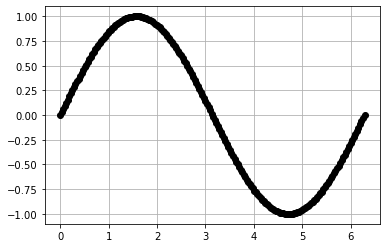

In [10]:
plt.plot(x,y , 'ko')
plt.grid()

In [11]:
def RightDerivative(f,x, h):
    d = 0.
    
    if (h != 0):
        d = (f(x+h)-f(x))/h
        
    return d

In [12]:
print (RightDerivative(Function, 0.5*np.pi , h))

-0.01570667138225457


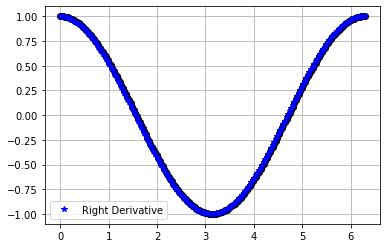

In [13]:
Dyr = RightDerivative(Function, x, h)
plt.plot(x,Dye , 'ko')
plt.plot(x,Dyr , 'b*', label = 'Right Derivative')
plt.grid()
plt.legend()

In [14]:
def LeftDerivative(f,x, h):
    
    d = 0.
    
    if (h != 0):
        d = (f(x)-f(x-h))/h
        
    return d

In [15]:
Dyl = LeftDerivative(Function, x, h)

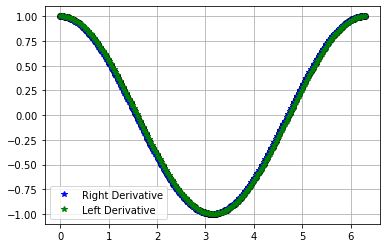

In [16]:
plt.plot(x,Dye , 'ko')
plt.plot(x,Dyr , 'b*', label = 'Right Derivative')
plt.plot(x,Dyl , 'g*', label = 'Left Derivative')
plt.grid()
plt.legend()

In [17]:
def CentralDerivative(f,x, h):
    
    d = 0.
    
    if (h != 0):
        d = (f(x+h)-f(x-h))/(2.*h)
        
    return d

In [18]:
Dyc = CentralDerivative(Function, x, h)

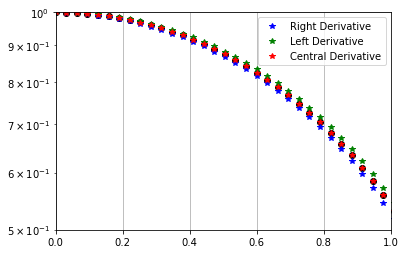

In [19]:
plt.plot(x,Dye , 'ko')
plt.plot(x,Dyr , 'b*', label = 'Right Derivative')
plt.plot(x,Dyl , 'g*', label = 'Left Derivative')
plt.plot(x,Dyc , 'r*', label = 'Central Derivative')
plt.grid()
plt.xlim(0. , 1.)
plt.ylim (0.5,1.)
plt.yscale('log')
plt.legend()

# Cálculo de Errores

In [20]:
ErrorL = np.abs(Dye-Dyl)
ErrorR = np.abs(Dye-Dyr)
ErrorC = np.abs(Dye-Dyc)

print(ErrorC)

[1.64485289e-04 1.64403308e-04 1.64157446e-04 1.63747948e-04
 1.63175223e-04 1.62439841e-04 1.61542536e-04 1.60484201e-04
 1.59265892e-04 1.57888824e-04 1.56354369e-04 1.54664056e-04
 1.52819570e-04 1.50822751e-04 1.48675589e-04 1.46380223e-04
 1.43938942e-04 1.41354180e-04 1.38628513e-04 1.35764658e-04
 1.32765470e-04 1.29633938e-04 1.26373185e-04 1.22986459e-04
 1.19477139e-04 1.15848721e-04 1.12104822e-04 1.08249175e-04
 1.04285623e-04 1.00218116e-04 9.60507101e-05 9.17875586e-05
 8.74329112e-05 8.29911089e-05 7.84665792e-05 7.38638323e-05
 6.91874563e-05 6.44421128e-05 5.96325319e-05 5.47635081e-05
 4.98398948e-05 4.48666000e-05 3.98485812e-05 3.47908405e-05
 2.96984195e-05 2.45763945e-05 1.94298712e-05 1.42639798e-05
 9.08386971e-06 3.89470465e-06 1.29834274e-06 6.49009591e-06
 1.16753796e-05 1.68490251e-05 2.20058750e-05 2.71407890e-05
 3.22486485e-05 3.73243619e-05 4.23628695e-05 4.73591488e-05
 5.23082196e-05 5.72051484e-05 6.20450538e-05 6.68231114e-05
 7.15345582e-05 7.617469

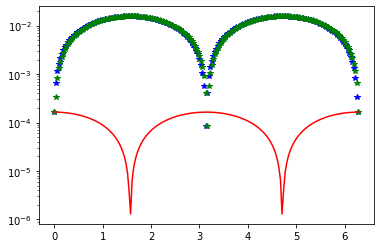

In [21]:
plt.plot(x , ErrorR, 'b*')
plt.plot(x , ErrorL, 'g*')
plt.plot(x , ErrorC, 'r-')
plt.yscale('log')

# Cálculo de Error Global

In [22]:
#Método 1
ErrorGlobalL =((sum((ErrorL)**2) )/(sum(Dyl**2)))**(1/2)
ErrorGlobalR =((sum((ErrorR)**2) )/(sum(Dyr**2)))**(1/2)
ErrorGlobalC =((sum((ErrorC)**2) )/(sum(Dyc**2)))**(1/2)



print(ErrorGlobalL)
print(ErrorGlobalR)
print(ErrorGlobalC)

0.015629860873852357
0.01562986087385055
0.00016451234931685383


In [23]:
#Método 2
Sum_num =0.
Sum_den = 0.
Array = ErrorC[:]

for i in range (len(Array)):
    
    Sum_num += Array[i]**2
    Sum_den += Dyc[i]**2


# Segunda Derivada

In [24]:
def SecondDerivative (f,x,h):
    
    d2 =0.
    
    if (h!=0):
        d2 = (f(x+h) -2.*f(x)+f(x-h)) /h**2
    return d2

In [25]:
D2y = SecondDerivative(Function,x,h)

D2ye = -np.sin(x)

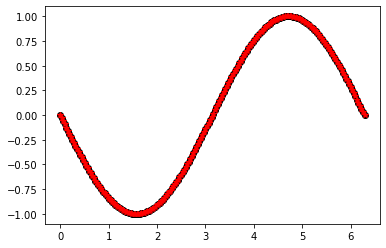

In [26]:
plt.plot(x , D2ye, 'ko')
plt.plot (x,D2y , 'r*')

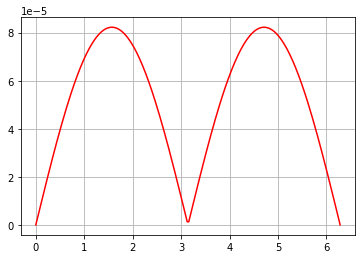

In [27]:
ErrorD2C = np.abs(D2ye-D2y)
plt.plot(x, ErrorD2C , 'r-')
plt.grid()